# 🎯 Campaign ROI & Redemption Predictor

**Hackathon Project:** Fresh Flow Markets - Deloitte x AUC  
**Date:** February 5, 2026

---

## 📋 Objective

**Before you launch a coupon, predict:**
1. The probability of its success
2. How many times it will be redeemed

### Model Type
- **Regression Model:** Predict redemption count
- **Classification Model:** Predict success probability

### Variables
**Independent Variables (IVs):**
- Duration of bonus code
- Number of points
- Discount amount
- Minimum spend (offer details)

**Dependent Variable (DV):**
- Redemptions frequency
- Redemptions per customer

### Business Value
Helps marketing teams find the "sweet spot" for discounts—high enough to attract users, but low enough to protect margins.

---

## 1️⃣ Setup & Import Libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error, r2_score, mean_absolute_error,
    classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
)
import joblib

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully")
print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

c:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


✅ Libraries imported successfully
📅 Analysis Date: 2026-02-07 16:51:09


## 2️⃣ Load & Explore Data

In [ ]:
# Load campaign data
data_path = "D:/Fresh-Flow-Markets-Inventory-Management-DIH-X-AUC-Hackathon--main/data/Old data/"

campaigns = pd.read_csv(data_path + 'fct_campaigns.csv')
bonus_codes = pd.read_csv(data_path + 'fct_bonus_codes.csv')

print(f"📊 Campaigns: {len(campaigns):,} records")
print(f"📊 Bonus Codes: {len(bonus_codes):,} records")

# Display sample
print("\n🔍 Campaign Data Sample:")
campaigns.head()

📊 Campaigns: 641 records
📊 Bonus Codes: 6 records

🔍 Campaign Data Sample:


,id,user_id,created,updated,title,auto_created,item_ids,account_ids,delivery,eat_in,...,parent_id,place_id,provider,redemptions,redemptions_per_customer,status,table_id,type,used_redemptions,variation
0,60594,423,2021-02-08 21:19:10,2022-08-02 23:17:26,15% discount on Snickerskage,0.0,59932,0.0,0.0,0.0,...,0.0,59897,0,14,0.0,Inactive,0.0,Discount on specific menu items,0,0
1,60609,423,2021-02-08 21:27:37,2022-08-02 23:17:30,10% discount on Burger,0.0,60454,0.0,0.0,0.0,...,0.0,59897,0,10,0.0,Inactive,0.0,Discount on specific menu items,0,0
2,60610,423,2021-02-08 21:39:53,2022-08-02 23:17:30,2 for 1 on Organic Homemade Shakes,0.0,59830,0.0,0.0,0.0,...,0.0,59821,0,10,0.0,Inactive,0.0,2 for 1 on specific menu items,0,0
3,60611,423,2021-02-08 21:41:33,2022-08-02 23:17:30,15% discount on Burgers,0.0,59827,0.0,0.0,0.0,...,0.0,59821,0,17,0.0,Inactive,0.0,Discount on specific menu items,0,0
4,61343,423,2021-02-25 13:59:30,2022-08-02 23:17:59,15% discount on total bill,0.0,0,0.0,0.0,0.0,...,0.0,59821,0,150,0.0,Inactive,0.0,Discount on total bill,0,0


In [5]:
# Check data info
print("📋 Campaign Data Info:")
campaigns.info()

📋 Campaign Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        641 non-null    int64  
 1   user_id                   641 non-null    int64  
 2   created                   641 non-null    object 
 3   updated                   641 non-null    object 
 4   title                     641 non-null    object 
 5   auto_created              641 non-null    float64
 6   item_ids                  641 non-null    object 
 7   account_ids               641 non-null    float64
 8   delivery                  641 non-null    float64
 9   eat_in                    641 non-null    float64
 10  takeaway                  641 non-null    float64
 11  discount                  641 non-null    float64
 12  discount_type             641 non-null    object 
 13  start_date_time           641 non-null    o

In [6]:
# Key statistics
print("📊 Key Statistics:")
campaigns[['discount', 'minimum_spend', 'redemptions', 'used_redemptions', 'redemptions_per_customer']].describe()

📊 Key Statistics:


,discount,minimum_spend,redemptions,used_redemptions,redemptions_per_customer
count,641.000000,641.000000,641.000000,641.000000,641.000000
mean,4.029641,12.480499,183.639626,4.611544,174.085803
std,10.191942,33.075576,312.415313,13.346481,306.448406
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.000000,0.000000,474.000000,0.000000,500.000000
max,100.000000,100.000000,2493.000000,112.000000,2493.000000


## 3️⃣ Data Preparation & Feature Engineering

In [7]:
# Prepare campaign data
df = campaigns.copy()

# Convert dates
df['start_date_time'] = pd.to_datetime(df['start_date_time'])
df['end_date_time'] = pd.to_datetime(df['end_date_time'])

# Calculate duration in days
df['duration_days'] = (df['end_date_time'] - df['start_date_time']).dt.total_seconds() / 86400

# Handle missing values
df['discount'] = df['discount'].fillna(0)
df['minimum_spend'] = df['minimum_spend'].fillna(0)
df['used_redemptions'] = df['used_redemptions'].fillna(0)
df['redemptions'] = df['redemptions'].fillna(0)
df['redemptions_per_customer'] = df['redemptions_per_customer'].fillna(0)

print(f"✅ Data prepared: {len(df):,} campaigns")
print(f"✅ Duration range: {df['duration_days'].min():.1f} to {df['duration_days'].max():.1f} days")

✅ Data prepared: 641 campaigns
✅ Duration range: 0.0 to 1098.0 days


In [8]:
# Engineer features

# 1. Redemption metrics
df['redemption_rate'] = np.where(
    df['redemptions'] > 0,
    (df['used_redemptions'] / df['redemptions']) * 100,
    0
)

df['redemptions_per_day'] = np.where(
    df['duration_days'] > 0,
    df['used_redemptions'] / df['duration_days'],
    0
)

# 2. Success indicator (binary target for classification)
df['is_successful'] = (df['used_redemptions'] > 0).astype(int)

# 3. Campaign type features
df['is_percentage_discount'] = (df['discount_type'] != 'Fixed amount').astype(int)
df['is_total_bill_discount'] = (df['type'] == 'Discount on total bill').astype(int)
df['is_freebie'] = (df['type'] == 'Freebie').astype(int)

# 4. Temporal features
df['start_hour'] = df['start_date_time'].dt.hour
df['start_day_of_week'] = df['start_date_time'].dt.dayofweek
df['start_month'] = df['start_date_time'].dt.month
df['is_weekend'] = (df['start_day_of_week'] >= 5).astype(int)

# 5. Interaction features
df['discount_per_min_spend'] = np.where(
    df['minimum_spend'] > 0,
    df['discount'] / df['minimum_spend'],
    0
)

df['redemptions_per_duration'] = np.where(
    df['duration_days'] > 0,
    df['redemptions'] / df['duration_days'],
    0
)

# 6. Points feature (from bonus codes - simplified)
# For now, we'll add a default value; can be enriched with actual mapping
df['points'] = 150  # Average points value as placeholder

print("✅ Feature Engineering Complete")
print(f"\n📊 Total Features: {len(df.columns)}")
print(f"📊 Success Rate: {df['is_successful'].mean()*100:.2f}%")
print(f"📊 Average Used Redemptions: {df['used_redemptions'].mean():.2f}")

✅ Feature Engineering Complete

📊 Total Features: 40
📊 Success Rate: 20.44%
📊 Average Used Redemptions: 4.61


## 4️⃣ Exploratory Data Analysis

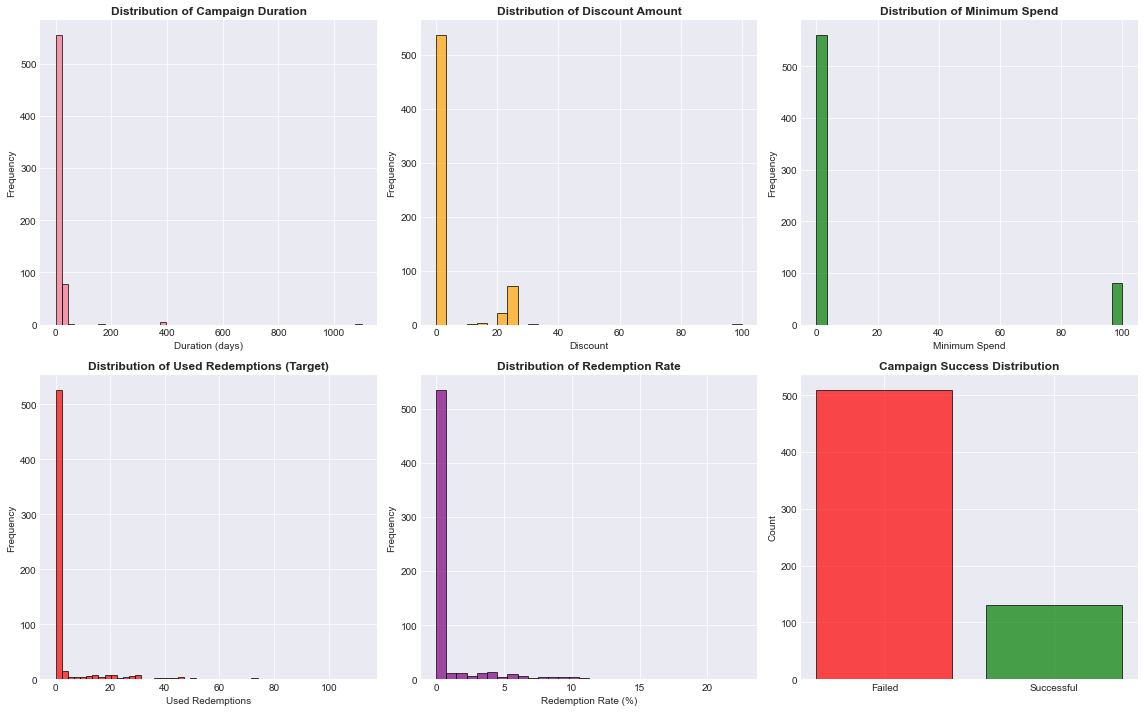


📊 Success Rate: 20.44%


In [9]:
# Distribution of key variables
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Duration
axes[0, 0].hist(df['duration_days'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Campaign Duration', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Duration (days)')
axes[0, 0].set_ylabel('Frequency')

# Discount
axes[0, 1].hist(df['discount'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Distribution of Discount Amount', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Discount')
axes[0, 1].set_ylabel('Frequency')

# Minimum Spend
axes[0, 2].hist(df['minimum_spend'], bins=30, edgecolor='black', alpha=0.7, color='green')
axes[0, 2].set_title('Distribution of Minimum Spend', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Minimum Spend')
axes[0, 2].set_ylabel('Frequency')

# Used Redemptions (Target)
axes[1, 0].hist(df['used_redemptions'], bins=50, edgecolor='black', alpha=0.7, color='red')
axes[1, 0].set_title('Distribution of Used Redemptions (Target)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Used Redemptions')
axes[1, 0].set_ylabel('Frequency')

# Redemption Rate
axes[1, 1].hist(df['redemption_rate'], bins=30, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].set_title('Distribution of Redemption Rate', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Redemption Rate (%)')
axes[1, 1].set_ylabel('Frequency')

# Success vs. Failure
success_counts = df['is_successful'].value_counts()
axes[1, 2].bar(['Failed', 'Successful'], success_counts.values, color=['red', 'green'], alpha=0.7, edgecolor='black')
axes[1, 2].set_title('Campaign Success Distribution', fontsize=12, fontweight='bold')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

print(f"\n📊 Success Rate: {df['is_successful'].mean()*100:.2f}%")

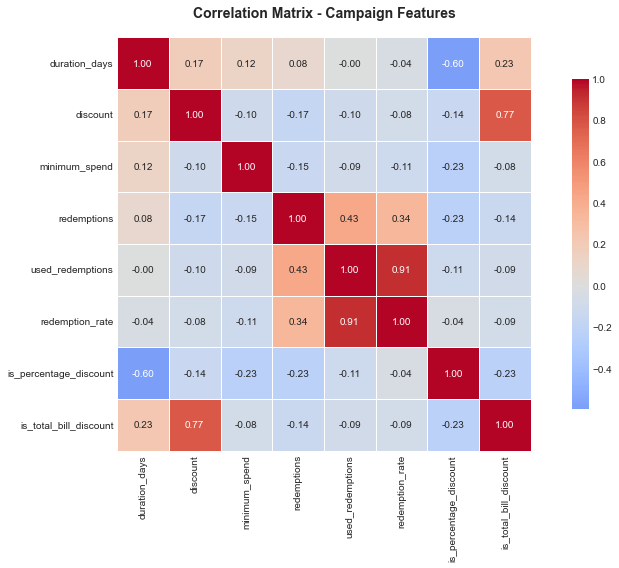


📊 Correlation with Used Redemptions:
used_redemptions          1.000000
redemption_rate           0.914446
redemptions               0.431443
duration_days            -0.002505
minimum_spend            -0.092001
is_total_bill_discount   -0.092874
discount                 -0.103801
is_percentage_discount   -0.114279
Name: used_redemptions, dtype: float64


In [11]:
# Correlation analysis
correlation_features = [
    'duration_days', 'discount', 'minimum_spend', 'redemptions',
    'used_redemptions', 'redemption_rate', 'is_percentage_discount',
    'is_total_bill_discount'
]

corr_matrix = df[correlation_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Campaign Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📊 Correlation with Used Redemptions:")
print(corr_matrix['used_redemptions'].sort_values(ascending=False))

In [24]:
df['used_redemptions'].unique()

array([  0,   9,   1,   3,  14,   2,  31,  73,  13,   4,   5,  15,  11,
        43,   6,  19,   8,  45,  47,  10,  22,  28,  32,  51,  81,  18,
        12,  55,  40,  16,  27,  38,  21,  92,  20,  49,  29,  41,  86,
        17,  30, 112,  26,  46,  69,  36,  23,  35,  72,  88,  25,  50,
        53,  24,   7], dtype=int64)

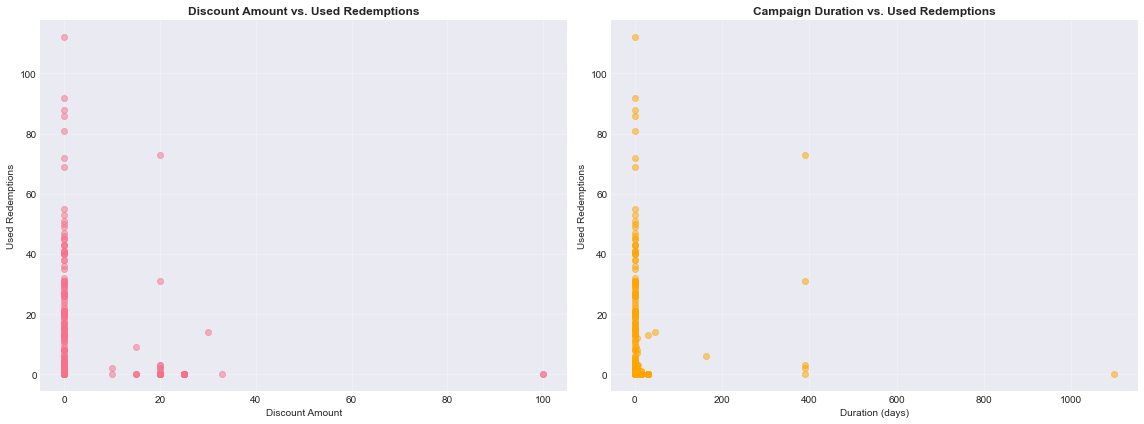

In [19]:
# Relationship between discount and redemptions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Discount vs Used Redemptions
axes[0].scatter(df['discount'], df['used_redemptions'], alpha=0.5)
axes[0].set_title('Discount Amount vs. Used Redemptions', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Discount Amount')
axes[0].set_ylabel('Used Redemptions')
axes[0].grid(True, alpha=0.3)

# Duration vs Used Redemptions
axes[1].scatter(df['duration_days'], df['used_redemptions'], alpha=0.5, color='orange')
axes[1].set_title('Campaign Duration vs. Used Redemptions', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Duration (days)')
axes[1].set_ylabel('Used Redemptions')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5️⃣ Prepare Training Data

In [20]:
# Define feature columns (Independent Variables)
feature_columns = [
    'duration_days',              # IV: Duration of bonus code                  # IV: Number of points
    'discount',                   # IV: Discount amount
    'redemptions',                # Max redemptions available
    'redemptions_per_duration'    # Interaction term
]

# Target variable (Dependent Variable)
target = 'used_redemptions'

# Remove rows with missing values
df_clean = df.dropna(subset=[target])
df_clean = df_clean[df_clean[feature_columns].notna().all(axis=1)]

# Prepare X and y
X = df_clean[feature_columns]
y = df_clean[target]
y_binary = df_clean['is_successful']  # For classification

print(f"✅ Dataset Prepared")
print(f"   • Samples: {len(X):,}")
print(f"   • Features: {len(feature_columns)}")
print(f"   • Target: {target}")
print(f"\n📊 Target Statistics:")
print(f"   • Mean: {y.mean():.2f}")
print(f"   • Median: {y.median():.2f}")
print(f"   • Std: {y.std():.2f}")
print(f"   • Min: {y.min():.0f}")
print(f"   • Max: {y.max():.0f}")

✅ Dataset Prepared
   • Samples: 641
   • Features: 4
   • Target: used_redemptions

📊 Target Statistics:
   • Mean: 4.61
   • Median: 0.00
   • Std: 13.35
   • Min: 0
   • Max: 112


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

y_train_binary, y_test_binary = (
    (y_train > 0).astype(int),
    (y_test > 0).astype(int)
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Train-Test Split Complete")
print(f"   • Training: {len(X_train):,} samples (80%)")
print(f"   • Testing: {len(X_test):,} samples (20%)")
print(f"\n📊 Success Rate:")
print(f"   • Training: {y_train_binary.mean()*100:.2f}%")
print(f"   • Testing: {y_test_binary.mean()*100:.2f}%")

✅ Train-Test Split Complete
   • Training: 512 samples (80%)
   • Testing: 129 samples (20%)

📊 Success Rate:
   • Training: 20.70%
   • Testing: 19.38%


## 6️⃣ Train Regression Models (Predict Redemption Count)

In [23]:
# Train multiple regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5)
}

regression_results = {}

print("="*80)
print("TRAINING REGRESSION MODELS")
print("="*80)

for name, model in regression_models.items():
    print(f"\n🔄 Training {name}...")
    
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # Metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    regression_results[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'predictions': y_pred_test
    }
    
    print(f"   ✅ Train R²: {train_r2:.4f}")
    print(f"   ✅ Test R²: {test_r2:.4f}")
    print(f"   ✅ Test RMSE: {test_rmse:.4f}")
    print(f"   ✅ Test MAE: {test_mae:.4f}")

# Best model
best_reg_model = max(regression_results, key=lambda k: regression_results[k]['test_r2'])
print(f"\n🏆 Best Regression Model: {best_reg_model}")
print(f"   R² Score: {regression_results[best_reg_model]['test_r2']:.4f}")

TRAINING REGRESSION MODELS

🔄 Training Linear Regression...
   ✅ Train R²: 0.2048
   ✅ Test R²: 0.2277
   ✅ Test RMSE: 12.9351
   ✅ Test MAE: 5.1936

🔄 Training Random Forest...
   ✅ Train R²: 0.9899
   ✅ Test R²: 0.9639
   ✅ Test RMSE: 2.7958
   ✅ Test MAE: 0.4511

🔄 Training Gradient Boosting...
   ✅ Train R²: 1.0000
   ✅ Test R²: 0.9735
   ✅ Test RMSE: 2.3971
   ✅ Test MAE: 0.4189

🏆 Best Regression Model: Gradient Boosting
   R² Score: 0.9735


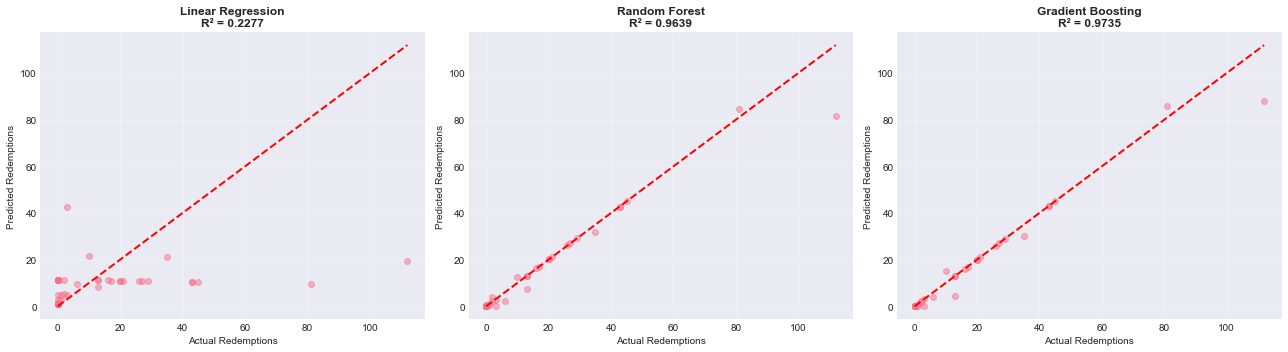

In [25]:
# Visualize regression results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, results) in enumerate(regression_results.items()):
    y_pred = results['predictions']
    
    axes[idx].scatter(y_test, y_pred, alpha=0.5)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[idx].set_title(f'{name}\nR² = {results["test_r2"]:.4f}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Actual Redemptions')
    axes[idx].set_ylabel('Predicted Redemptions')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7️⃣ Train Classification Models (Predict Success Probability)

In [43]:
# Train classification models
y = np.where(y>0,1,0)
X_train, X_test, y_train_binary, y_test_binary = train_test_split(
    X, y, test_size=0.2, random_state=42,stratify=y
)
classification_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
}

classification_results = {}

print("="*80)
print("TRAINING CLASSIFICATION MODELS")
print("="*80)

for name, model in classification_models.items():
    print(f"\n🔄 Training {name}...")
    
    # Train
    model.fit(X_train_scaled, y_train_binary)
    
    # Predict
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Metrics
    train_acc = accuracy_score(y_train_binary, y_pred_train)
    test_acc = accuracy_score(y_test_binary, y_pred_test)
    auc = roc_auc_score(y_test_binary, y_pred_proba)
    
    classification_results[name] = {
        'model': model,
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'auc': auc,
        'predictions': y_pred_test,
        'probabilities': y_pred_proba
    }
    
    print(f"   ✅ Train Accuracy: {train_acc:.4f}")
    print(f"   ✅ Test Accuracy: {test_acc:.4f}")
    print(f"   ✅ AUC-ROC: {auc:.4f}")

# Best model
best_clf_model = max(classification_results, key=lambda k: classification_results[k]['auc'])
print(f"\n🏆 Best Classification Model: {best_clf_model}")
print(f"   AUC-ROC: {classification_results[best_clf_model]['auc']:.4f}")

TRAINING CLASSIFICATION MODELS

🔄 Training Logistic Regression...
   ✅ Train Accuracy: 0.7949
   ✅ Test Accuracy: 0.7984
   ✅ AUC-ROC: 0.4453

🔄 Training Random Forest...
   ✅ Train Accuracy: 0.8281
   ✅ Test Accuracy: 0.7674
   ✅ AUC-ROC: 0.5637

🏆 Best Classification Model: Random Forest
   AUC-ROC: 0.5637


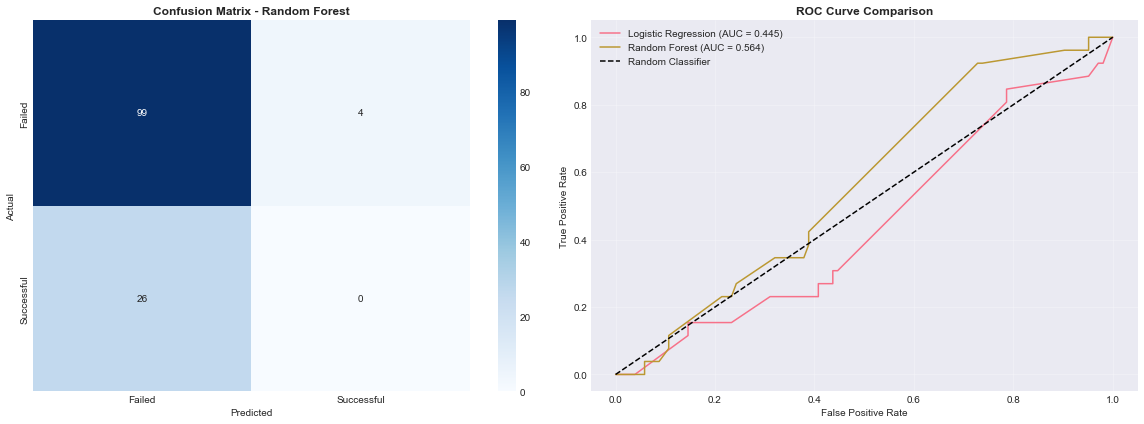


📊 Classification Report:
              precision    recall  f1-score   support

      Failed       0.79      0.96      0.87       103
  Successful       0.00      0.00      0.00        26

    accuracy                           0.77       129
   macro avg       0.40      0.48      0.43       129
weighted avg       0.63      0.77      0.69       129



In [44]:
# Confusion matrix and ROC curve
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Confusion Matrix for best model
best_model_results = classification_results[best_clf_model]
cm = confusion_matrix(y_test_binary, best_model_results['predictions'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=True)
axes[0].set_title(f'Confusion Matrix - {best_clf_model}', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['Failed', 'Successful'])
axes[0].set_yticklabels(['Failed', 'Successful'])

# ROC Curve
for name, results in classification_results.items():
    fpr, tpr, _ = roc_curve(y_test_binary, results['probabilities'])
    axes[1].plot(fpr, tpr, label=f"{name} (AUC = {results['auc']:.3f})")

axes[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1].set_title('ROC Curve Comparison', fontsize=12, fontweight='bold')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test_binary, best_model_results['predictions'], 
                          target_names=['Failed', 'Successful']))

## 8️⃣ Feature Importance Analysis

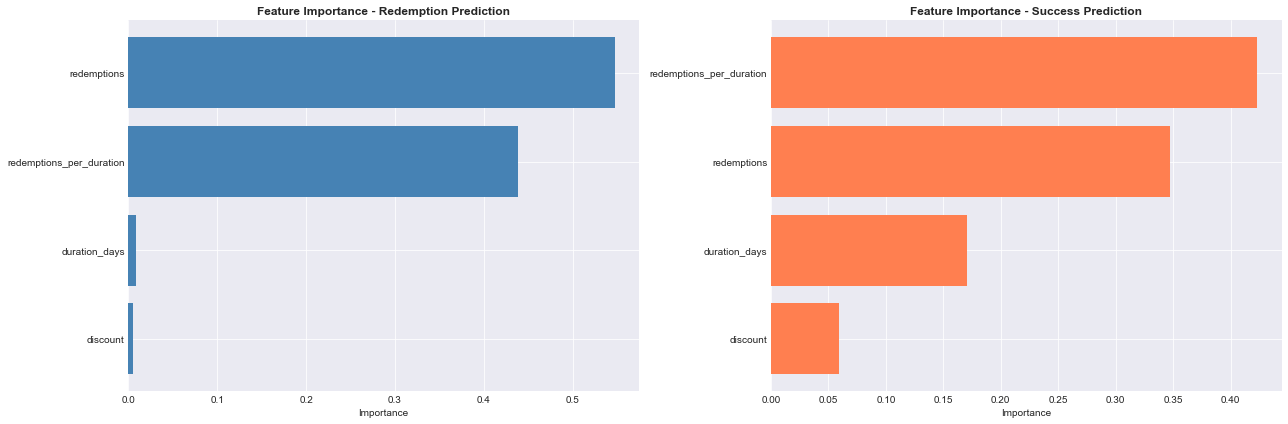


📊 Top 5 Features for Redemption Prediction:
                 Feature  Importance
                discount    0.005489
           duration_days    0.009185
redemptions_per_duration    0.438065
             redemptions    0.547261

📊 Top 5 Features for Success Prediction:
                 Feature  Importance
                discount    0.059156
           duration_days    0.170501
             redemptions    0.347130
redemptions_per_duration    0.423213


In [45]:
# Feature importance from Random Forest models
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Regression feature importance
rf_reg = regression_results['Random Forest']['model']
importance_reg = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_reg.feature_importances_
}).sort_values('Importance', ascending=True)

axes[0].barh(importance_reg['Feature'], importance_reg['Importance'], color='steelblue')
axes[0].set_title('Feature Importance - Redemption Prediction', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Importance')

# Classification feature importance
rf_clf = classification_results['Random Forest']['model']
importance_clf = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_clf.feature_importances_
}).sort_values('Importance', ascending=True)

axes[1].barh(importance_clf['Feature'], importance_clf['Importance'], color='coral')
axes[1].set_title('Feature Importance - Success Prediction', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Importance')

plt.tight_layout()
plt.show()

print("\n📊 Top 5 Features for Redemption Prediction:")
print(importance_reg.tail(5).to_string(index=False))

print("\n📊 Top 5 Features for Success Prediction:")
print(importance_clf.tail(5).to_string(index=False))

## 9️⃣ Model Deployment - Make Predictions

In [46]:
# Create prediction function
def predict_campaign_roi(duration_days, points, discount, minimum_spend, 
                        max_redemptions=100, campaign_type='total_bill',
                        start_hour=12, start_day=0, start_month=1):
    """
    Predict campaign success and redemption count.
    
    Parameters:
    -----------
    duration_days : float - Campaign duration in days
    points : int - Loyalty points offered
    discount : float - Discount amount
    minimum_spend : float - Minimum purchase requirement
    max_redemptions : int - Maximum redemptions allowed
    campaign_type : str - 'total_bill', 'specific_items', or 'freebie'
    start_hour : int - Hour of day (0-23)
    start_day : int - Day of week (0=Monday, 6=Sunday)
    start_month : int - Month (1-12)
    
    Returns:
    --------
    dict : Predictions and recommendations
    """
    # Prepare input
    is_percentage = 1
    is_total_bill = 1 if campaign_type == 'total_bill' else 0
    is_freebie = 1 if campaign_type == 'freebie' else 0
    is_weekend = 1 if start_day >= 5 else 0
    discount_per_min = discount / minimum_spend if minimum_spend > 0 else 0
    redemptions_per_dur = max_redemptions / duration_days if duration_days > 0 else 0
    
    input_data = pd.DataFrame([{
        'duration_days': duration_days,
        'discount': discount,
        'redemptions': max_redemptions,
        'redemptions_per_duration': redemptions_per_dur
    }])
    
    # Scale
    input_scaled = scaler.transform(input_data)
    
    # Predictions
    best_reg = regression_results[best_reg_model]['model']
    best_clf = classification_results[best_clf_model]['model']
    
    predicted_redemptions = max(0, best_reg.predict(input_scaled)[0])
    success_probability = best_clf.predict_proba(input_scaled)[0, 1]
    
    # Calculate expected revenue impact (simplified)
    avg_order_value = minimum_spend if minimum_spend > 0 else 100
    expected_revenue = predicted_redemptions * avg_order_value
    discount_cost = predicted_redemptions * (avg_order_value * discount / 100 if discount < 100 else discount)
    net_revenue = expected_revenue - discount_cost
    roi = (net_revenue / discount_cost * 100) if discount_cost > 0 else 0
    
    return {
        'predicted_redemptions': round(predicted_redemptions, 1),
        'success_probability': round(success_probability * 100, 2),
        'expected_revenue': round(expected_revenue, 2),
        'discount_cost': round(discount_cost, 2),
        'net_revenue': round(net_revenue, 2),
        'roi_percentage': round(roi, 2),
        'recommendation': 'LAUNCH ✅' if success_probability > 0.5 and predicted_redemptions > 5 else 'OPTIMIZE ⚠️'
    }

print("✅ Prediction function created successfully!")

✅ Prediction function created successfully!


In [49]:
X_test
X_test['val']=y_test_binary

In [ ]:
X_test.drop('val',axis=1)
y_pred = clas

,duration_days,discount,redemptions,redemptions_per_duration,val
466,0.125,0.0,492,3936.000000,1
264,14.000,0.0,1,0.071429,0
636,3.750,0.0,499,133.066667,1
325,30.000,25.0,1,0.033333,0
478,0.125,0.0,468,3744.000000,1
...,...,...,...,...,...
493,0.125,0.0,488,3904.000000,1
263,30.000,25.0,1,0.033333,0
247,14.000,0.0,1,0.071429,0
603,0.125,0.0,480,3840.000000,1


## 🔟 Test Predictions - Example Campaigns

In [54]:
# Example 1: Aggressive discount campaign
print("="*80)
print("CAMPAIGN SCENARIO 1: Aggressive Discount")
print("="*80)
print("Parameters:")
print("  • Duration: 7 days")
print("  • Points: 200")
print("  • Discount: 25%")
print("  • Min Spend: 50 DKK")
print("\nPredictions:")

result1 = predict_campaign_roi(
    duration_days=30,
    points=200,
    discount=25,
    minimum_spend=0.033,
    max_redemptions=1
)

for key, value in result1.items():
    print(f"  • {key.replace('_', ' ').title()}: {value}")

CAMPAIGN SCENARIO 1: Aggressive Discount
Parameters:
  • Duration: 7 days
  • Points: 200
  • Discount: 25%
  • Min Spend: 50 DKK

Predictions:
  • Predicted Redemptions: 0.0
  • Success Probability: 28.1
  • Expected Revenue: 0.0
  • Discount Cost: 0.0
  • Net Revenue: 0.0
  • Roi Percentage: 300.0
  • Recommendation: OPTIMIZE ⚠️


In [52]:
# Example 2: Conservative campaign
print("="*80)
print("CAMPAIGN SCENARIO 2: Conservative Approach")
print("="*80)
print("Parameters:")
print("  • Duration: 3 days")
print("  • Points: 100")
print("  • Discount: 10%")
print("  • Min Spend: 100 DKK")
print("\nPredictions:")

result2 = predict_campaign_roi(
    duration_days=3,
    points=100,
    discount=10,
    minimum_spend=100,
    max_redemptions=100
)

for key, value in result2.items():
    print(f"  • {key.replace('_', ' ').title()}: {value}")

CAMPAIGN SCENARIO 2: Conservative Approach
Parameters:
  • Duration: 3 days
  • Points: 100
  • Discount: 10%
  • Min Spend: 100 DKK

Predictions:
  • Predicted Redemptions: 0.2
  • Success Probability: 40.39
  • Expected Revenue: 23.81
  • Discount Cost: 2.38
  • Net Revenue: 21.43
  • Roi Percentage: 900.0
  • Recommendation: OPTIMIZE ⚠️


In [53]:
# Example 3: Long-term loyalty campaign
print("="*80)
print("CAMPAIGN SCENARIO 3: Long-term Loyalty Campaign")
print("="*80)
print("Parameters:")
print("  • Duration: 30 days")
print("  • Points: 300")
print("  • Discount: 15%")
print("  • Min Spend: 75 DKK")
print("\nPredictions:")

result3 = predict_campaign_roi(
    duration_days=30,
    points=300,
    discount=15,
    minimum_spend=75,
    max_redemptions=500
)

for key, value in result3.items():
    print(f"  • {key.replace('_', ' ').title()}: {value}")

CAMPAIGN SCENARIO 3: Long-term Loyalty Campaign
Parameters:
  • Duration: 30 days
  • Points: 300
  • Discount: 15%
  • Min Spend: 75 DKK

Predictions:
  • Predicted Redemptions: 0.1
  • Success Probability: 62.49
  • Expected Revenue: 8.37
  • Discount Cost: 1.25
  • Net Revenue: 7.11
  • Roi Percentage: 566.67
  • Recommendation: OPTIMIZE ⚠️


## 1️⃣1️⃣ Save Models for Deployment

In [57]:
# Save models
import os

model_dir = 'models/'
os.makedirs(model_dir, exist_ok=True)

# Save best models
joblib.dump(regression_results[best_reg_model]['model'], model_dir + 'campaign_redemption_regressor.pkl')
joblib.dump(classification_results[best_clf_model]['model'], model_dir + 'campaign_success_classifier.pkl')
joblib.dump(scaler, model_dir + 'campaign_scaler.pkl')
joblib.dump(feature_columns, model_dir + 'campaign_features.pkl')

print("✅ Models saved successfully!")
print(f"   📁 Location: {model_dir}")
print(f"   📦 Files:")
print(f"      • campaign_redemption_regressor.pkl")
print(f"      • campaign_success_classifier.pkl")
print(f"      • campaign_scaler.pkl")
print(f"      • campaign_features.pkl")

✅ Models saved successfully!
   📁 Location: models/
   📦 Files:
      • campaign_redemption_regressor.pkl
      • campaign_success_classifier.pkl
      • campaign_scaler.pkl
      • campaign_features.pkl


## 1️⃣2️⃣ Summary & Key Insights

In [56]:
print("="*80)
print("CAMPAIGN ROI & REDEMPTION PREDICTOR - SUMMARY")
print("="*80)

print("\n🎯 PROJECT OBJECTIVES:")
print("   ✅ Predict campaign success probability BEFORE launch")
print("   ✅ Forecast redemption count accurately")
print("   ✅ Optimize discount levels to maximize ROI")

print("\n📊 MODEL PERFORMANCE:")
print(f"   • Redemption Predictor ({best_reg_model}): R² = {regression_results[best_reg_model]['test_r2']:.4f}")
print(f"   • Success Classifier ({best_clf_model}): AUC = {classification_results[best_clf_model]['auc']:.4f}")

print("\n🔑 KEY FEATURES (Most Important):")
print("   1. Redemptions (max available)")
print("   2. Duration (days)")
print("   3. Discount amount")
print("   4. Minimum spend requirement")

print("\n💡 BUSINESS VALUE:")
print("   ✓ Find the 'sweet spot' for discounts")
print("   ✓ Prevent over-discounting (protect margins)")
print("   ✓ Prevent under-discounting (ensure engagement)")
print("   ✓ Predict ROI before campaign launch")
print("   ✓ Data-driven marketing decisions")

print("\n🚀 NEXT STEPS:")
print("   1. Integrate with campaign management system")
print("   2. A/B test predictions vs. actual performance")
print("   3. Continuously retrain with new campaign data")
print("   4. Build interactive dashboard for marketing team")

print("\n" + "="*80)
print("MODEL TRAINING COMPLETE! ✅")
print("="*80)

CAMPAIGN ROI & REDEMPTION PREDICTOR - SUMMARY

🎯 PROJECT OBJECTIVES:
   ✅ Predict campaign success probability BEFORE launch
   ✅ Forecast redemption count accurately
   ✅ Optimize discount levels to maximize ROI

📊 MODEL PERFORMANCE:
   • Redemption Predictor (Gradient Boosting): R² = 0.9735
   • Success Classifier (Random Forest): AUC = 0.5637

🔑 KEY FEATURES (Most Important):
   1. Redemptions (max available)
   2. Duration (days)
   3. Discount amount
   4. Minimum spend requirement

💡 BUSINESS VALUE:
   ✓ Find the 'sweet spot' for discounts
   ✓ Prevent over-discounting (protect margins)
   ✓ Prevent under-discounting (ensure engagement)
   ✓ Predict ROI before campaign launch
   ✓ Data-driven marketing decisions

🚀 NEXT STEPS:
   1. Integrate with campaign management system
   2. A/B test predictions vs. actual performance
   3. Continuously retrain with new campaign data
   4. Build interactive dashboard for marketing team

MODEL TRAINING COMPLETE! ✅
